# TORCH

In [ ]:
dev =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dev

device(type='cuda', index=0)

In [ ]:

maxlen = 750
X_train, X_test, y_train, y_test = train_test_split(df_lstm.summary, y, test_size=0.2, random_state=557) 
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('input_train shape:', X_train.shape)
print('input_test shape:', X_test.shape)

X_train_tensor = torch.tensor(X_train)
X_test_tensor = torch.tensor(X_test)
y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)

# X_train_tensor.to(dev)
# X_test_tensor.to(dev)
# y_train_tensor.to(dev)
# y_test_tensor.to(dev)

input_train shape: (2400, 750)
input_test shape: (600, 750)


In [ ]:
embedding_size = 32
hidden_size = 64
num_layers = 1

model = nn.Sequential(
    nn.Embedding(max_features, 32),
    nn.LSTM(input_size=32, hidden_size=hidden_size, num_layers=num_layers),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid()
)  
model.to(dev)

optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()


In [ ]:
history = train_model(
            model=model,
            x_train=X_train_tensor,
            y_train=y_train_tensor,
            x_test=X_test_tensor,
            y_test=y_test_tensor,
            epochs=10,
            optimizer=optimizer,
            criterion=criterion,
            device=dev)


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


#### LabelEncoder

In [ ]:
le2 = LabelEncoder()
all_words = ' '.join(df_lstm.summary).split(' ')
le2.fit_transform(all_words)

dict(zip(le2.classes_, le2.transform(le2.classes_)))


{'0': 0,
 '00000': 1,
 '00001': 2,
 '029270769x': 3,
 '03': 4,
 '0301': 5,
 '0446602078': 6,
 '06': 7,
 '0879973862': 8,
 '0879976039': 9,
 '0879977590': 10,
 '092': 11,
 '093': 12,
 '094': 13,
 '1': 14,
 '10': 15,
 '100': 16,
 '1000': 17,
 '10000': 18,
 '100000': 19,
 '100000000': 20,
 '10012': 21,
 '100nbsplb': 22,
 '100page': 23,
 '1011': 24,
 '1018': 25,
 '10181018': 26,
 '102': 27,
 '1020': 28,
 '103': 29,
 '1030': 30,
 '103000': 31,
 '103d': 32,
 '104': 33,
 '1045': 34,
 '1052': 35,
 '1058': 36,
 '1062': 37,
 '108': 38,
 '108yearold': 39,
 '1099': 40,
 '109yearold': 41,
 '10pm11pm': 42,
 '10th': 43,
 '10thcenturi': 44,
 '10yearold': 45,
 '11': 46,
 '110': 47,
 '11000': 48,
 '110th': 49,
 '1112': 50,
 '112': 51,
 '1121': 52,
 '1123': 53,
 '1124': 54,
 '1125': 55,
 '1139': 56,
 '113th': 57,
 '114': 58,
 '114000': 59,
 '1145': 60,
 '115200': 61,
 '1155': 62,
 '1189': 63,
 '119': 64,
 '11911': 65,
 '1199': 66,
 '11pm12pm': 67,
 '11th': 68,
 '11year': 69,
 '11yearold': 70,
 '12': 71,


In [ ]:
features = len(le2.classes_)
features

40570

In [ ]:
def replace_with_number(summary):
    words = summary.split()
    return le2.transform(words)

df_lstm['summary'] = df_lstm.summary.apply(replace_with_number)
df_lstm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_lstm.summary, y, test_size=0.2, random_state=557) 

In [ ]:
X_train = sequence.pad_sequences(X_train, maxlen=2000)
X_test = sequence.pad_sequences(X_test, maxlen=2000)
print('input_train shape:', X_train.shape)
print('input_test shape:', X_test.shape)

input_train shape: (2400, 2000)
input_test shape: (600, 2000)


In [ ]:
model = Sequential()
model.add(Embedding(features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 952ms/step - acc: 0.1797 - loss: 0.0075 - val_acc: 0.1771 - val_loss: -5.6312
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 949ms/step - acc: 0.1674 - loss: -5.9976 - val_acc: 0.1771 - val_loss: -8.6216
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 971ms/step - acc: 0.1632 - loss: -8.6644 - val_acc: 0.1771 - val_loss: -10.9097
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 959ms/step - acc: 0.1637 - loss: -10.5536 - val_acc: 0.1771 - val_loss: -12.7610
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 958ms/step - acc: 0.1742 - loss: -11.9521 - val_acc: 0.1771 - val_loss: -14.2879
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 989ms/step - acc: 0.1670 - loss: -13.1787 - val_acc: 0.1771 - val_loss: -15.5816
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 973ms/step - acc: 0.1790 - loss: -14.9223 - val_acc: 0.1771 - val_loss: -16.6944
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 921ms/step - acc: 0.1811 - loss: -15.5636 - val_acc: 0.1771 - val_loss: -17.7112
Epoch 9/10
15/15 ━━━━━

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (128, 2000, 32)        │     1,298,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (128, 32)              │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (128, 1)               │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,613,188 (9.97 MB)

 Trainable params: 1,306,593 (4.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,306,595 (4.98 MB)

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file="model.png")

You must install pydot (`pip install pydot`) for `plot_model` to work.


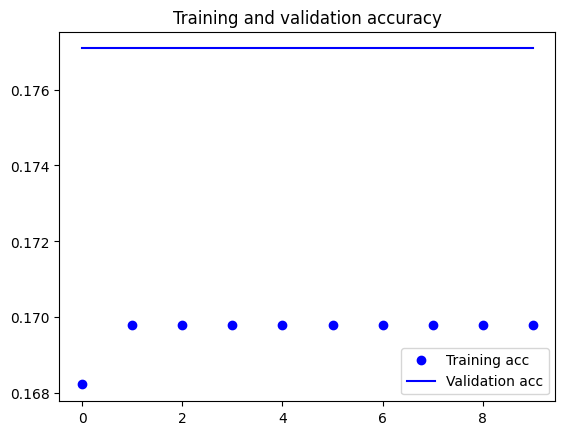

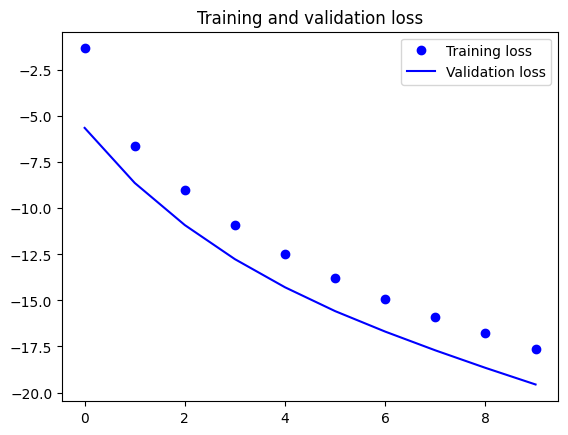

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()